In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# Chennai

In [15]:
data_chennai = pd.read_excel('/content/chennai_cars.xlsx')
data_chennai.head(5)

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Minivans', 'k...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Low...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [16]:
data_chennai.isnull().mean() * 100

,0
new_car_detail,0.0
new_car_overview,0.0
new_car_feature,0.0
new_car_specs,0.0
car_links,0.0


In [17]:
fuel_type = []
Kilometers_driven = []
Transmission_type = []
No_of_owners = []
Original_Equipment_Manufacturer = []
model = []
model_Year = []
Price = []
registration_year = []
seats = []
engine_cc = []
Mileage = []
Max_power = []
Max_Speed = []

for i in range(data_chennai.shape[0]):
    new_car_detail = data_chennai['new_car_detail'][i]
    new_car_overview = data_chennai['new_car_overview'][i]
    new_car_specs = data_chennai['new_car_specs'][i]

    data_dict = ast.literal_eval(new_car_detail)
    data_dict_1 = ast.literal_eval(new_car_overview)
    data_dict_2 = ast.literal_eval(new_car_specs)

    fuel_type.append(data_dict['ft'])
    Kilometers_driven.append(data_dict['km'])
    Transmission_type.append(data_dict['transmission'])
    No_of_owners.append(data_dict['ownerNo'])
    Original_Equipment_Manufacturer.append(data_dict['oem'])
    model.append(data_dict['model'])
    model_Year.append(int(data_dict['modelYear']))
    Price.append(float(data_dict['price'][2:-5])*100000)
    registration_year.append(data_dict_1['top'][0]['value'][-4:])
    seats.append(data_dict_1['top'][3]['value'][0])

    try:
        if (data_dict_2['data'][0]['list'][2]['value']).isnumeric():
            engine_cc.append(data_dict_2['data'][0]['list'][2]['value'])
        else:
            engine_cc.append(data_dict_2['data'][0]['list'][1]['value'])
    except:
        engine_cc.append(np.nan)


    Mileage.append(data_dict_2['top'][0]['value'][:-5])



data_chennai['Fuel_Type'] = fuel_type
data_chennai['Kilometers_Driven'] = Kilometers_driven
data_chennai['Transmission_Type'] = Transmission_type
data_chennai['No_of_Owners'] = No_of_owners
data_chennai['Manufactured_By'] = Original_Equipment_Manufacturer
data_chennai['Car_Model'] = model
data_chennai['Car_Produced_Year'] = model_Year
data_chennai['Car_Price'] = Price
data_chennai['Registration_Year'] = registration_year
data_chennai['No_of_Seats'] = seats
data_chennai['Engine_CC'] = engine_cc
data_chennai['Mileage(kmpl)'] = Mileage

In [18]:
data_chennai.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl)
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"20,000",Automatic,1,Kia,Kia Sonet,2022,1150000.0,2022,5,998,9
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Minivans', 'k...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Low...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"20,687",Manual,1,Maruti,Maruti Eeco,2015,415000.0,2015,7,1196,15.37
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"30,000",Manual,1,Nissan,Nissan Magnite,2021,750000.0,2021,5,999,20
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"59,247",Manual,1,Hyundai,Hyundai i10,2015,398000.0,2015,5,1086,19.81
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"50,000",Manual,1,Honda,Honda Jazz,2015,550000.0,2015,5,1199,18.7


In [19]:
data_chennai['Location'] = 'Chennai'

In [20]:
data_chennai.shape

(1419, 18)

In [21]:
data_chennai.isnull().mean() * 100

,0
new_car_detail,0.000000
new_car_overview,0.000000
new_car_feature,0.000000
new_car_specs,0.000000
car_links,0.000000
Fuel_Type,0.000000
Kilometers_Driven,0.000000
Transmission_Type,0.000000
No_of_Owners,0.000000
Manufactured_By,0.000000


In [22]:
data_chennai.fillna(0, inplace=True)

In [23]:

data_chennai.isnull().mean() * 100

,0
new_car_detail,0.0
new_car_overview,0.0
new_car_feature,0.0
new_car_specs,0.0
car_links,0.0
Fuel_Type,0.0
Kilometers_Driven,0.0
Transmission_Type,0.0
No_of_Owners,0.0
Manufactured_By,0.0


# Bangalore

In [24]:
data_bangalore = pd.read_excel('/content/bangalore_cars.xlsx')
data_bangalore.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [25]:
data_bangalore.isnull().mean() * 100

,0
new_car_detail,0.0
new_car_overview,0.0
new_car_feature,0.0
new_car_specs,0.0
car_links,0.0


In [26]:
fuel_type = []
Kilometers_driven = []
Transmission_type = []
No_of_owners = []
Original_Equipment_Manufacturer = []
model = []
model_Year = []
Price = []
registration_year = []
seats = []
engine_cc = []
Mileage = []

for i in range(data_bangalore.shape[0]):
    new_car_detail = data_bangalore['new_car_detail'][i]
    new_car_overview = data_bangalore['new_car_overview'][i]
    new_car_specs = data_bangalore['new_car_specs'][i]

    data_dict = ast.literal_eval(new_car_detail)
    data_dict_1 = ast.literal_eval(new_car_overview)
    data_dict_2 = ast.literal_eval(new_car_specs)

    fuel_type.append(data_dict['ft'])
    Kilometers_driven.append(data_dict['km'])
    Transmission_type.append(data_dict['transmission'])
    No_of_owners.append(data_dict['ownerNo'])
    Original_Equipment_Manufacturer.append(data_dict['oem'])
    model.append(data_dict['model'])
    model_Year.append(int(data_dict['modelYear']))
    Price.append(float(data_dict['price'][2:-5])*100000)
    registration_year.append(data_dict_1['top'][0]['value'][-4:])
    seats.append(data_dict_1['top'][3]['value'][0])

    try:
        if (data_dict_2['data'][0]['list'][2]['value']).isnumeric():
            engine_cc.append(data_dict_2['data'][0]['list'][2]['value'])
        else:
            engine_cc.append(data_dict_2['data'][0]['list'][1]['value'])
    except:
        engine_cc.append(np.nan)

    Mileage.append(data_dict_2['top'][0]['value'][:-5])



data_bangalore['Fuel_Type'] = fuel_type
data_bangalore['Kilometers_Driven'] = Kilometers_driven
data_bangalore['Transmission_Type'] = Transmission_type
data_bangalore['No_of_Owners'] = No_of_owners
data_bangalore['Manufactured_By'] = Original_Equipment_Manufacturer
data_bangalore['Car_Model'] = model
data_bangalore['Car_Produced_Year'] = model_Year
data_bangalore['Car_Price'] = Price
data_bangalore['Registration_Year'] = registration_year
data_bangalore['No_of_Seats'] = seats
data_bangalore['Engine_CC'] = engine_cc
data_bangalore['Mileage(kmpl)'] = Mileage

In [27]:
data_bangalore['Location'] = "Bangalore"

In [28]:
data_bangalore.isnull().mean() * 100

,0
new_car_detail,0.000000
new_car_overview,0.000000
new_car_feature,0.000000
new_car_specs,0.000000
car_links,0.000000
Fuel_Type,0.000000
Kilometers_Driven,0.000000
Transmission_Type,0.000000
No_of_Owners,0.000000
Manufactured_By,0.000000


In [29]:
data_bangalore.fillna(0,inplace = True)

In [30]:
data_bangalore.isnull().mean() * 100

,0
new_car_detail,0.0
new_car_overview,0.0
new_car_feature,0.0
new_car_specs,0.0
car_links,0.0
Fuel_Type,0.0
Kilometers_Driven,0.0
Transmission_Type,0.0
No_of_Owners,0.0
Manufactured_By,0.0


In [31]:
data_bangalore.head(2)

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl),Location
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"1,20,000",Manual,3,Maruti,Maruti Celerio,2015,400000.0,2015,5,998,23.1,Bangalore
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"32,706",Manual,2,Ford,Ford Ecosport,2018,811000.0,2018,5,1497,17,Bangalore


# Delhi

In [32]:
data_delhi = pd.read_excel('/content/delhi_cars.xlsx')

In [33]:
data_delhi.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [34]:
data_delhi.isnull().mean() * 100

,0
new_car_detail,0.0
new_car_overview,0.0
new_car_feature,0.0
new_car_specs,0.0
car_links,0.0


In [35]:
fuel_type = []
Kilometers_driven = []
Transmission_type = []
No_of_owners = []
Original_Equipment_Manufacturer = []
model = []
model_Year = []
Price = []
registration_year = []
seats = []
engine_cc = []
Mileage = []
Max_power = []
Max_Speed = []

for i in range(data_delhi.shape[0]):
    new_car_detail = data_delhi['new_car_detail'][i]
    new_car_overview = data_delhi['new_car_overview'][i]
    new_car_specs = data_delhi['new_car_specs'][i]

    data_dict = ast.literal_eval(new_car_detail)
    data_dict_1 = ast.literal_eval(new_car_overview)
    data_dict_2 = ast.literal_eval(new_car_specs)

    fuel_type.append(data_dict['ft'])
    Kilometers_driven.append(data_dict['km'])
    Transmission_type.append(data_dict['transmission'])
    No_of_owners.append(data_dict['ownerNo'])
    Original_Equipment_Manufacturer.append(data_dict['oem'])
    model.append(data_dict['model'])
    model_Year.append(int(data_dict['modelYear']))
    Price.append(float(data_dict['price'][2:-5])*100000)
    registration_year.append(data_dict_1['top'][0]['value'][-4:])
    seats.append(data_dict_1['top'][3]['value'][0])

    try:
        if (data_dict_2['data'][0]['list'][2]['value']).isnumeric():
            engine_cc.append(data_dict_2['data'][0]['list'][2]['value'])
        else:
            engine_cc.append(data_dict_2['data'][0]['list'][1]['value'])
    except:
        engine_cc.append(np.nan)

    Mileage.append(data_dict_2['top'][0]['value'][:-5])



data_delhi['Fuel_Type'] = fuel_type
data_delhi['Kilometers_Driven'] = Kilometers_driven
data_delhi['Transmission_Type'] = Transmission_type
data_delhi['No_of_Owners'] = No_of_owners
data_delhi['Manufactured_By'] = Original_Equipment_Manufacturer
data_delhi['Car_Model'] = model
data_delhi['Car_Produced_Year'] = model_Year
data_delhi['Car_Price'] = Price
data_delhi['Registration_Year'] = registration_year
data_delhi['No_of_Seats'] = seats
data_delhi['Engine_CC'] = engine_cc
data_delhi['Mileage(kmpl)'] = Mileage

In [36]:
data_delhi['Location'] = "Delhi"

In [37]:
data_delhi.isnull().mean() * 100

,0
new_car_detail,0.00000
new_car_overview,0.00000
new_car_feature,0.00000
new_car_specs,0.00000
car_links,0.00000
Fuel_Type,0.00000
Kilometers_Driven,0.00000
Transmission_Type,0.00000
No_of_Owners,0.00000
Manufactured_By,0.00000


In [38]:
data_delhi.fillna(0,inplace =True)

In [39]:
data_delhi.head(5)

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl),Location
0,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"10,000",Automatic,1,Kia,Kia Seltos,2022,1900000.0,2022,5,1493,18,Delhi
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"57,437",Manual,2,Hyundai,Hyundai Creta,2016,762000.0,2016,5,1591,15.29,Delhi
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"8,000",Automatic,1,Mercedes-Benz,Mercedes-Benz GLC,2020,5600000.0,2020,5,1991,12.74,Delhi
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"28,151",Manual,2,Maruti,Maruti Swift,2018,523000.0,2019,5,1197,22.38,Delhi
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"60,000",Manual,1,Hyundai,Hyundai Creta,2017,765000.0,2017,5,1591,15.29,Delhi


# Hyderabad

In [40]:
data_hyderabad = pd.read_excel('/content/hyderabad_cars.xlsx')

In [41]:
data_hyderabad.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [42]:
data_hyderabad.isnull().mean() * 100

,0
new_car_detail,0.0
new_car_overview,0.0
new_car_feature,0.0
new_car_specs,0.0
car_links,0.0


In [43]:
fuel_type = []
Kilometers_driven = []
Transmission_type = []
No_of_owners = []
Original_Equipment_Manufacturer = []
model = []
model_Year = []
Price = []
registration_year = []
seats = []
engine_cc = []
Mileage = []
Max_power = []
Max_Speed = []

for i in range(data_hyderabad.shape[0]):
    new_car_detail = data_hyderabad['new_car_detail'][i]
    new_car_overview = data_hyderabad['new_car_overview'][i]
    new_car_specs = data_hyderabad['new_car_specs'][i]

    data_dict = ast.literal_eval(new_car_detail)
    data_dict_1 = ast.literal_eval(new_car_overview)
    data_dict_2 = ast.literal_eval(new_car_specs)

    fuel_type.append(data_dict['ft'])
    Kilometers_driven.append(data_dict['km'])
    Transmission_type.append(data_dict['transmission'])
    No_of_owners.append(data_dict['ownerNo'])
    Original_Equipment_Manufacturer.append(data_dict['oem'])
    model.append(data_dict['model'])
    model_Year.append(int(data_dict['modelYear']))
    Price.append(float(data_dict['price'][2:-5])*100000)
    registration_year.append(data_dict_1['top'][0]['value'][-4:])
    seats.append(data_dict_1['top'][3]['value'][0])

    try:
        if (data_dict_2['data'][0]['list'][2]['value']).isnumeric():
            engine_cc.append(data_dict_2['data'][0]['list'][2]['value'])
        else:
            engine_cc.append(data_dict_2['data'][0]['list'][1]['value'])
    except:
        engine_cc.append(np.nan)

    Mileage.append(data_dict_2['top'][0]['value'][:-5])



data_hyderabad['Fuel_Type'] = fuel_type
data_hyderabad['Kilometers_Driven'] = Kilometers_driven
data_hyderabad['Transmission_Type'] = Transmission_type
data_hyderabad['No_of_Owners'] = No_of_owners
data_hyderabad['Manufactured_By'] = Original_Equipment_Manufacturer
data_hyderabad['Car_Model'] = model
data_hyderabad['Car_Produced_Year'] = model_Year
data_hyderabad['Car_Price'] = Price
data_hyderabad['Registration_Year'] = registration_year
data_hyderabad['No_of_Seats'] = seats
data_hyderabad['Engine_CC'] = engine_cc
data_hyderabad['Mileage(kmpl)'] = Mileage

In [44]:
data_hyderabad['Location'] = 'Hyderabad'

In [45]:
data_hyderabad.isnull().mean() * 100

,0
new_car_detail,0.000000
new_car_overview,0.000000
new_car_feature,0.000000
new_car_specs,0.000000
car_links,0.000000
Fuel_Type,0.000000
Kilometers_Driven,0.000000
Transmission_Type,0.000000
No_of_Owners,0.000000
Manufactured_By,0.000000


In [46]:
data_hyderabad.fillna(0, inplace = True)

In [47]:
data_hyderabad.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl),Location
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"20,000",Automatic,1,Volkswagen,Volkswagen Polo,2022,1044000.0,2022,5,999,16.47,Hyderabad
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"85,582",Manual,2,Hyundai,Hyundai EON,2014,260000.0,2014,5,814,21.1,Hyderabad
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"10,000",Manual,1,Hyundai,Hyundai Venue,2023,955000.0,2023,5,1197,11,Hyderabad
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"50,750",Manual,1,Maruti,Maruti Baleno,2017,671000.0,2017,5,1197,21.4,Hyderabad
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"10,000",Automatic,1,Mahindra,Mahindra Thar,2022,1900000.0,2022,4,1997,19,Hyderabad


# Jaipur

In [48]:
data_jaipur = pd.read_excel("/content/jaipur_cars.xlsx")

In [49]:
data_jaipur.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [50]:
data_jaipur.isnull().mean() * 100

,0
new_car_detail,0.0
new_car_overview,0.0
new_car_feature,0.0
new_car_specs,0.0
car_links,0.0


In [51]:
fuel_type = []
Kilometers_driven = []
Transmission_type = []
No_of_owners = []
Original_Equipment_Manufacturer = []
model = []
model_Year = []
Price = []
registration_year = []
seats = []
engine_cc = []
Mileage = []
Max_power = []
Max_Speed = []

for i in range(data_jaipur.shape[0]):
    new_car_detail = data_jaipur['new_car_detail'][i]
    new_car_overview = data_jaipur['new_car_overview'][i]
    new_car_specs = data_jaipur['new_car_specs'][i]

    data_dict = ast.literal_eval(new_car_detail)
    data_dict_1 = ast.literal_eval(new_car_overview)
    data_dict_2 = ast.literal_eval(new_car_specs)

    fuel_type.append(data_dict['ft'])
    Kilometers_driven.append(data_dict['km'])
    Transmission_type.append(data_dict['transmission'])
    No_of_owners.append(data_dict['ownerNo'])
    Original_Equipment_Manufacturer.append(data_dict['oem'])
    model.append(data_dict['model'])
    model_Year.append(int(data_dict['modelYear']))
    Price.append(float(data_dict['price'][2:-5])*100000)
    registration_year.append(data_dict_1['top'][0]['value'][-4:])
    seats.append(data_dict_1['top'][3]['value'][0])

    try:
        if (data_dict_2['data'][0]['list'][2]['value']).isnumeric():
            engine_cc.append(data_dict_2['data'][0]['list'][2]['value'])
        else:
            engine_cc.append(data_dict_2['data'][0]['list'][1]['value'])
    except:
        engine_cc.append(np.nan)

    Mileage.append(data_dict_2['top'][0]['value'][:-5])



data_jaipur['Fuel_Type'] = fuel_type
data_jaipur['Kilometers_Driven'] = Kilometers_driven
data_jaipur['Transmission_Type'] = Transmission_type
data_jaipur['No_of_Owners'] = No_of_owners
data_jaipur['Manufactured_By'] = Original_Equipment_Manufacturer
data_jaipur['Car_Model'] = model
data_jaipur['Car_Produced_Year'] = model_Year
data_jaipur['Car_Price'] = Price
data_jaipur['Registration_Year'] = registration_year
data_jaipur['No_of_Seats'] = seats
data_jaipur['Engine_CC'] = engine_cc
data_jaipur['Mileage(kmpl)'] = Mileage

In [52]:
data_jaipur['Location'] = "Jaipur"

In [53]:
data_jaipur.isnull().mean() * 100

,0
new_car_detail,0.000000
new_car_overview,0.000000
new_car_feature,0.000000
new_car_specs,0.000000
car_links,0.000000
Fuel_Type,0.000000
Kilometers_Driven,0.000000
Transmission_Type,0.000000
No_of_Owners,0.000000
Manufactured_By,0.000000


In [54]:
data_jaipur.fillna(0, inplace = True)

In [55]:
data_jaipur.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl),Location
0,"{'it': 0, 'ft': 'Diesel', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"1,20,000",Manual,2,Hyundai,Hyundai i20,2015,510000.0,2015,5,1396,22.54,Jaipur
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"66,951",Manual,1,Maruti,Maruti Swift,2012,381000.0,2012,5,1197,22.38,Jaipur
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"80,000",Automatic,2,Maruti,Maruti Celerio,2016,320000.0,2016,5,998,23.1,Jaipur
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"44,392",Manual,1,Hyundai,Hyundai Grand i10,2017,420000.0,2017,5,1197,18.9,Jaipur
4,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"40,000",Automatic,1,Maruti,Maruti Wagon R,2016,350000.0,2016,5,998,20.51,Jaipur


# Kolkata

In [56]:
data_kolkata = pd.read_excel('/content/kolkata_cars.xlsx')

In [57]:
data_kolkata.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...


In [58]:
data_kolkata.isnull().mean() * 100

,0
new_car_detail,0.0
new_car_overview,0.0
new_car_feature,0.0
new_car_specs,0.0
car_links,0.0


In [59]:
fuel_type = []
Kilometers_driven = []
Transmission_type = []
No_of_owners = []
Original_Equipment_Manufacturer = []
model = []
model_Year = []
Price = []
registration_year = []
seats = []
engine_cc = []
Mileage = []
Max_power = []
Max_Speed = []

for i in range(data_kolkata.shape[0]):
    new_car_detail = data_kolkata['new_car_detail'][i]
    new_car_overview = data_kolkata['new_car_overview'][i]
    new_car_specs = data_kolkata['new_car_specs'][i]

    data_dict = ast.literal_eval(new_car_detail)
    data_dict_1 = ast.literal_eval(new_car_overview)
    data_dict_2 = ast.literal_eval(new_car_specs)

    fuel_type.append(data_dict['ft'])
    Kilometers_driven.append(data_dict['km'])
    Transmission_type.append(data_dict['transmission'])
    No_of_owners.append(data_dict['ownerNo'])
    Original_Equipment_Manufacturer.append(data_dict['oem'])
    model.append(data_dict['model'])
    model_Year.append(int(data_dict['modelYear']))
    Price.append(float(data_dict['price'][2:-5])*100000)
    registration_year.append(data_dict_1['top'][0]['value'][-4:])
    seats.append(data_dict_1['top'][3]['value'][0])

    try:
        if (data_dict_2['data'][0]['list'][2]['value']).isnumeric():
            engine_cc.append(data_dict_2['data'][0]['list'][2]['value'])
        else:
            engine_cc.append(data_dict_2['data'][0]['list'][1]['value'])
    except:
        engine_cc.append(np.nan)

    Mileage.append(data_dict_2['top'][0]['value'][:-5])



data_kolkata['Fuel_Type'] = fuel_type
data_kolkata['Kilometers_Driven'] = Kilometers_driven
data_kolkata['Transmission_Type'] = Transmission_type
data_kolkata['No_of_Owners'] = No_of_owners
data_kolkata['Manufactured_By'] = Original_Equipment_Manufacturer
data_kolkata['Car_Model'] = model
data_kolkata['Car_Produced_Year'] = model_Year
data_kolkata['Car_Price'] = Price
data_kolkata['Registration_Year'] = registration_year
data_kolkata['No_of_Seats'] = seats
data_kolkata['Engine_CC'] = engine_cc
data_kolkata['Mileage(kmpl)'] = Mileage

In [60]:
data_kolkata['Location'] = 'Kolakata'

In [61]:
data_kolkata.isnull().mean() * 100

,0
new_car_detail,0.000000
new_car_overview,0.000000
new_car_feature,0.000000
new_car_specs,0.000000
car_links,0.000000
Fuel_Type,0.000000
Kilometers_Driven,0.000000
Transmission_Type,0.000000
No_of_Owners,0.000000
Manufactured_By,0.000000


In [62]:
data_kolkata.fillna(0, inplace =True)

In [63]:
data_kolkata.head()

,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl),Location
0,"{'it': 0, 'ft': 'Petrol', 'bt': 'Sedan', 'km':...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"70,000",Automatic,3,Toyota,Toyota Camry,2014,975000.0,2014,5,2494,19.16,Kolakata
1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"23,981",Manual,1,Datsun,Datsun RediGO,2017,266000.0,2017,5,799,22.7,Kolakata
2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"7,100",Automatic,1,Renault,Renault Kiger,2021,595000.0,2021,5,999,19.03,Kolakata
3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"71,574",Manual,2,Hyundai,Hyundai i20,2011,223000.0,2012,5,1197,17,Kolakata
4,"{'it': 0, 'ft': 'Diesel', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Diesel,"50,000",Automatic,2,Audi,Audi Q3,2014,1200000.0,2014,5,1968,15.73,Kolakata


# Concat

In [64]:
data = pd.concat([data_chennai,data_bangalore,data_delhi,data_hyderabad,data_jaipur,data_kolkata]).reset_index()

In [65]:
data.shape

(8369, 19)

In [66]:
data.head()

,index,new_car_detail,new_car_overview,new_car_feature,new_car_specs,car_links,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl),Location
0,0,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"20,000",Automatic,1,Kia,Kia Sonet,2022,1150000.0,2022,5,998,9,Chennai
1,1,"{'it': 0, 'ft': 'Petrol', 'bt': 'Minivans', 'k...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Low...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"20,687",Manual,1,Maruti,Maruti Eeco,2015,415000.0,2015,7,1196,15.37,Chennai
2,2,"{'it': 0, 'ft': 'Petrol', 'bt': 'SUV', 'km': '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"30,000",Manual,1,Nissan,Nissan Magnite,2021,750000.0,2021,5,999,20,Chennai
3,3,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/buy-used-car-details/...,Petrol,"59,247",Manual,1,Hyundai,Hyundai i10,2015,398000.0,2015,5,1086,19.81,Chennai
4,4,"{'it': 0, 'ft': 'Petrol', 'bt': 'Hatchback', '...","{'heading': 'Car overview', 'top': [{'key': 'R...","{'heading': 'Features', 'top': [{'value': 'Pow...","{'heading': 'Specifications', 'top': [{'key': ...",https://www.cardekho.com/used-car-details/used...,Petrol,"50,000",Manual,1,Honda,Honda Jazz,2015,550000.0,2015,5,1199,18.7,Chennai


In [67]:
data.isnull().mean() * 100

,0
index,0.0
new_car_detail,0.0
new_car_overview,0.0
new_car_feature,0.0
new_car_specs,0.0
car_links,0.0
Fuel_Type,0.0
Kilometers_Driven,0.0
Transmission_Type,0.0
No_of_Owners,0.0


In [68]:
data.drop(['Car_Model_Year', 'Seats'], axis=1, inplace=True)


KeyError: "['Car_Model_Year', 'Seats'] not found in axis"

In [ ]:
data.head()

In [69]:
data.shape

(8369, 19)

# Data Cleaning

In [70]:
data.drop(['index','new_car_detail','new_car_overview','new_car_feature','new_car_specs','car_links'], axis = 1, inplace = True)

In [71]:
Car_Produced_Year = data[data['Registration_Year'].isin(['sive', 'able', 'ance','arty'])]['Car_Produced_Year']
data.loc[data['Registration_Year'].isin(['sive', 'able', 'ance','arty']),'Registration_Year'] = Car_Produced_Year

In [72]:
data['Car_Age'] = data['Car_Produced_Year'].apply(lambda x: 2024-x)

In [73]:
data['Engine_CC'].unique()

array(['998', '1196', '999', '1086', '1199', '2143', '1995', '1497',
       '1197', '1956', '2755', '1198', '1248', '0', '1582', '1984',
       '2694', '1498', '1298', '1461', '1798', '1364', '1591', '1968',
       '2967', '2393', '2993', '1368', '2198', '1373', '1598', '2179',
       '1462', '1451', '1194', '1991', '1493', '1998', '4663', '2987',
       '796', '1186', '1799', '1950', '1496', '2925', '1396', '1353',
       '799', '1405', '814', '2494', 0, '1399', '1997', '1047', '2999',
       '1499', '2184', '1896', '1999', '1969', '1495', '1390', '1120',
       '1482', '2523', '2354', '624', '793', '936', '4134', '993', '2499',
       '2982', '1796', '1422', '1172', '1468', '1599', '1586', '1193',
       '2199', '1330', '2696', '2400', '2477', '2998', '2997', '2995',
       '1395', '2487', '1797', '1341', '1397', '3198', '1332', '2148',
       '1299', '1061', '2497', '1590', '1781', '2953', '1595', 'Power',
       '2496', '210AH Lithium Ion', '2362', '1389', '1597', '2498', '995',
  

In [74]:
data.loc[(data['Engine_CC'].isin(['210AH Lithium Ion','Power','72','0']))|(data['Engine_CC'].isna()==True)]['Engine_CC'].value_counts()

,count
Engine_CC,
0,26
Power,3
210AH Lithium Ion,1
72,1


In [75]:
data.loc[data['Engine_CC'].isin(['72']),'Engine_CC'] = '720'
engine_cc = data.loc[data['Engine_CC'].isin(['Power','210AH Lithium Ion'])]
data.drop(engine_cc.index, inplace = True)

In [76]:
empty_values = data.loc[data['Mileage(kmpl)']=='']
data.drop(empty_values.index, inplace = True)

In [77]:
data.loc[(data['Engine_CC'].isin(['0']))|(data['Engine_CC'].isna()==True)][['Manufactured_By','Car_Model']]

,Manufactured_By,Car_Model


In [78]:
for i,j in zip(data.loc[(data['Engine_CC'].isin(['0']))|(data['Engine_CC'].isna()==True)]['Manufactured_By'],data.loc[(data['Engine_CC'].isin(['0']))|(data['Engine_CC'].isna()==True)]['Car_Model']):
    value = data.loc[(data['Manufactured_By'] == i)&(data['Car_Model'] == j)]['Engine_CC'].value_counts().index[0]
    data.loc[(data['Engine_CC'].isin(['0']))|(data['Engine_CC'].isna()==True),'Engine_CC'] = value

In [79]:
data.loc[(data['Engine_CC'].isin(['0']))|(data['Engine_CC'].isna()==True)].shape

(0, 14)

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8339 entries, 0 to 8368
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Fuel_Type          8339 non-null   object 
 1   Kilometers_Driven  8339 non-null   object 
 2   Transmission_Type  8339 non-null   object 
 3   No_of_Owners       8339 non-null   int64  
 4   Manufactured_By    8339 non-null   object 
 5   Car_Model          8339 non-null   object 
 6   Car_Produced_Year  8339 non-null   int64  
 7   Car_Price          8339 non-null   float64
 8   Registration_Year  8339 non-null   object 
 9   No_of_Seats        8339 non-null   object 
 10  Engine_CC          8339 non-null   object 
 11  Mileage(kmpl)      8339 non-null   object 
 12  Location           8339 non-null   object 
 13  Car_Age            8339 non-null   int64  
dtypes: float64(1), int64(3), object(10)
memory usage: 977.2+ KB


In [81]:
data['Kilometers_Driven'] = data['Kilometers_Driven'].apply(lambda x: x.replace(',',''))
data['Kilometers_Driven'] = data['Kilometers_Driven'].astype('int')
data['Registration_Year'] = data['Registration_Year'].astype('int')
data['No_of_Seats'] = data['No_of_Seats'].astype('int')
data['Engine_CC'] = data['Engine_CC'].astype('int')
data['Mileage(kmpl)'] = data['Mileage(kmpl)'].astype('float')

In [82]:
data[data.duplicated()]

,Fuel_Type,Kilometers_Driven,Transmission_Type,No_of_Owners,Manufactured_By,Car_Model,Car_Produced_Year,Car_Price,Registration_Year,No_of_Seats,Engine_CC,Mileage(kmpl),Location,Car_Age
55,Diesel,80000,Manual,1,Maruti,Maruti Ciaz,2017,850000.0,2017,5,1248,28.09,Chennai,7
77,Petrol,53967,Manual,1,Maruti,Maruti Baleno,2016,550000.0,2016,5,1197,21.40,Chennai,8
179,Petrol,20000,Automatic,1,MG,MG Hector,2022,1990000.0,2022,5,1451,14.00,Chennai,2
307,Petrol,54024,Manual,1,Maruti,Maruti Baleno,2017,575000.0,2017,5,1197,21.40,Chennai,7
487,Petrol,70000,Automatic,1,BMW,BMW X3,2019,4800000.0,2019,5,1998,13.17,Chennai,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8212,Petrol,54000,Automatic,1,Volkswagen,Volkswagen Vento,2017,650000.0,2017,5,1197,18.19,Kolakata,7
8264,Petrol,29000,Automatic,1,Hyundai,Hyundai Venue,2021,950000.0,2021,5,998,18.15,Kolakata,3
8297,Petrol,20000,Manual,1,Kia,Kia Carens,2022,1099000.0,2022,7,1497,14.00,Kolakata,2
8339,Petrol,10000,Manual,1,Maruti,Maruti Swift,2021,650000.0,2021,5,1197,21.21,Kolakata,3


In [83]:
data.drop_duplicates(inplace = True)

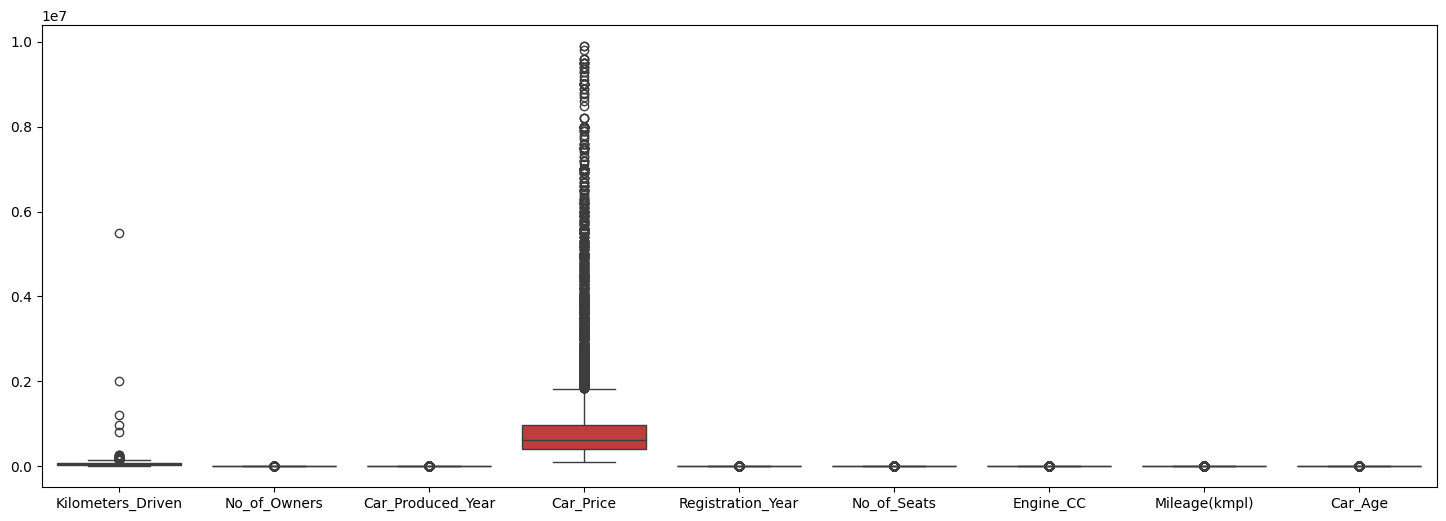

In [84]:
plt.figure(figsize=(18,6))
sns.boxplot(data=data)
plt.show()

Kilometers_Driven


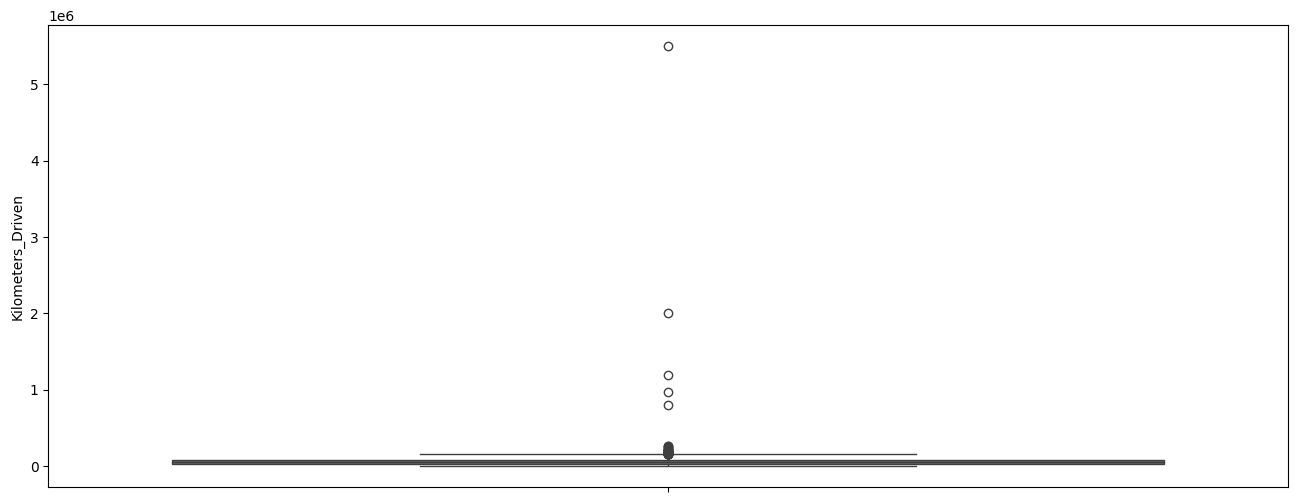

No_of_Owners


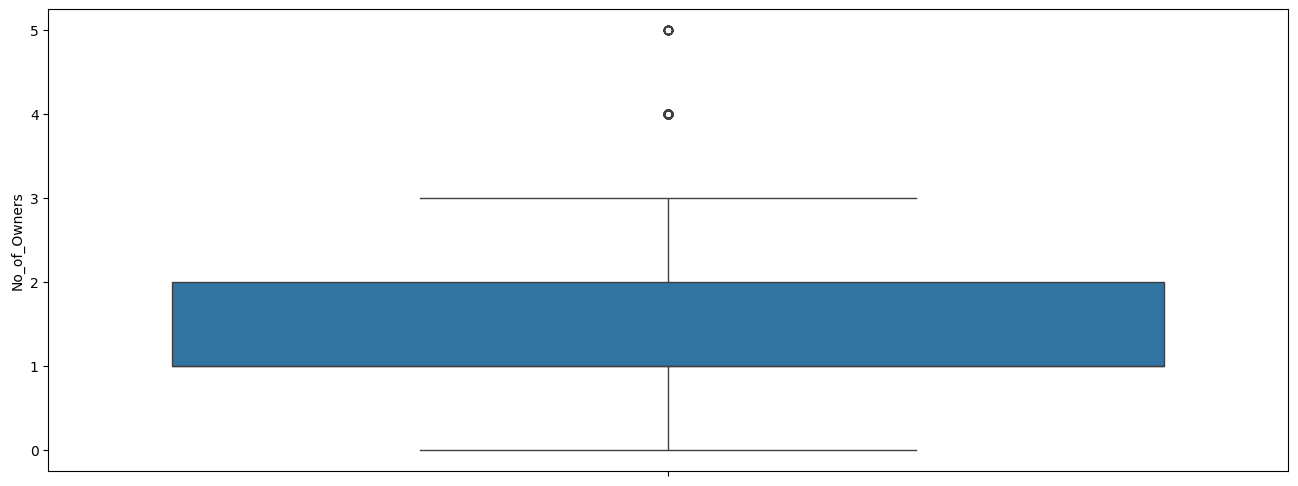

Car_Produced_Year


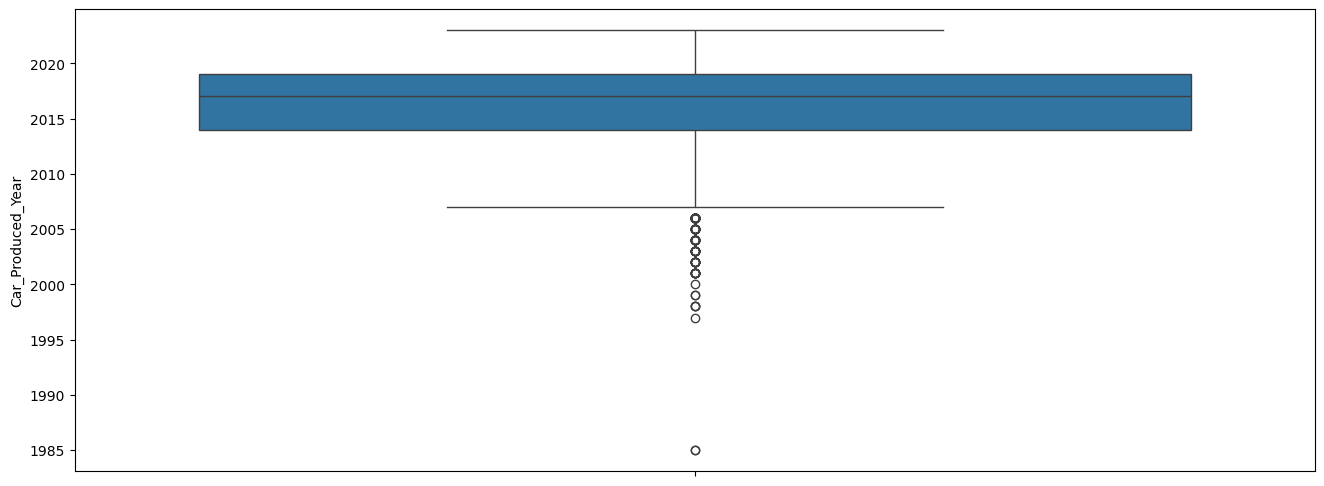

Car_Price


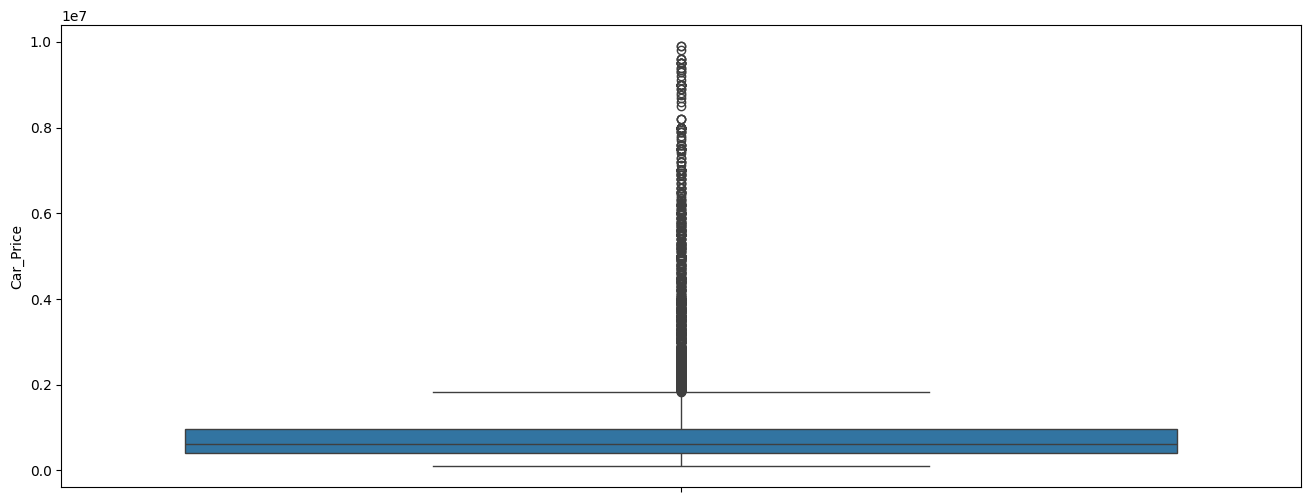

Registration_Year


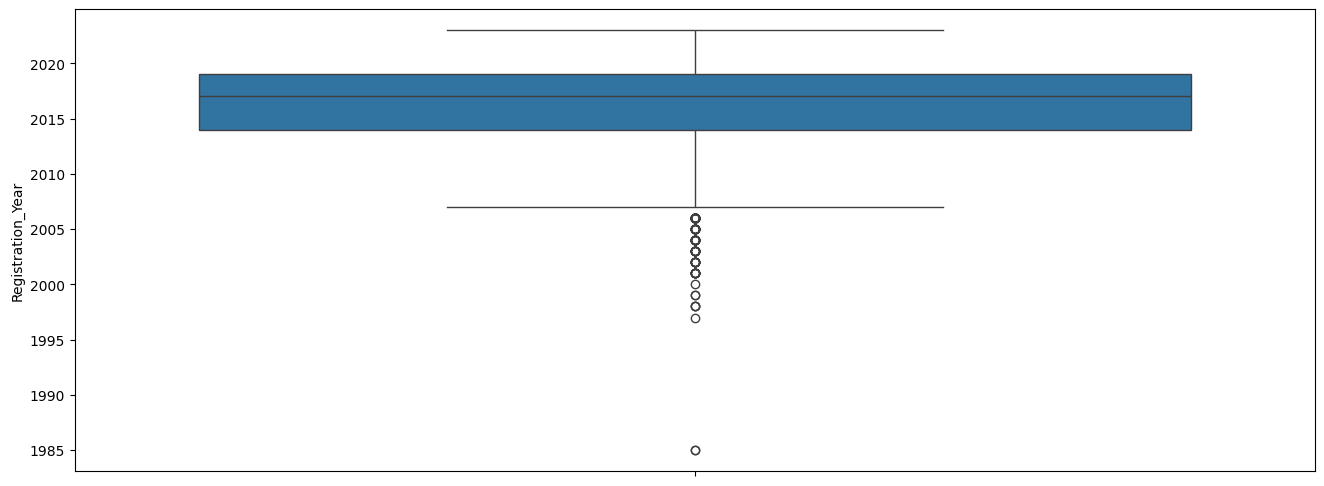

No_of_Seats


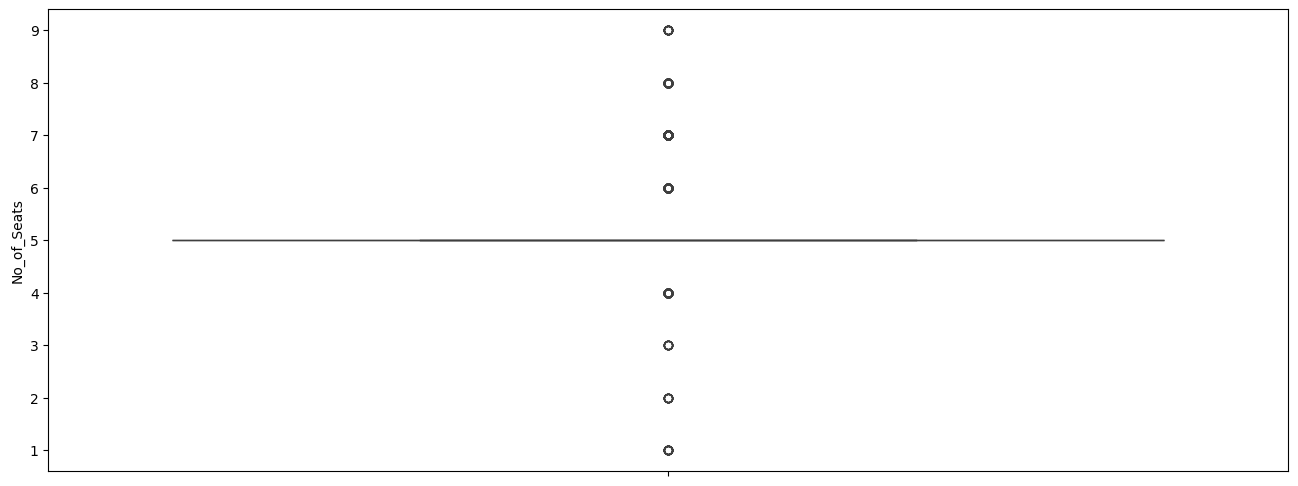

Engine_CC


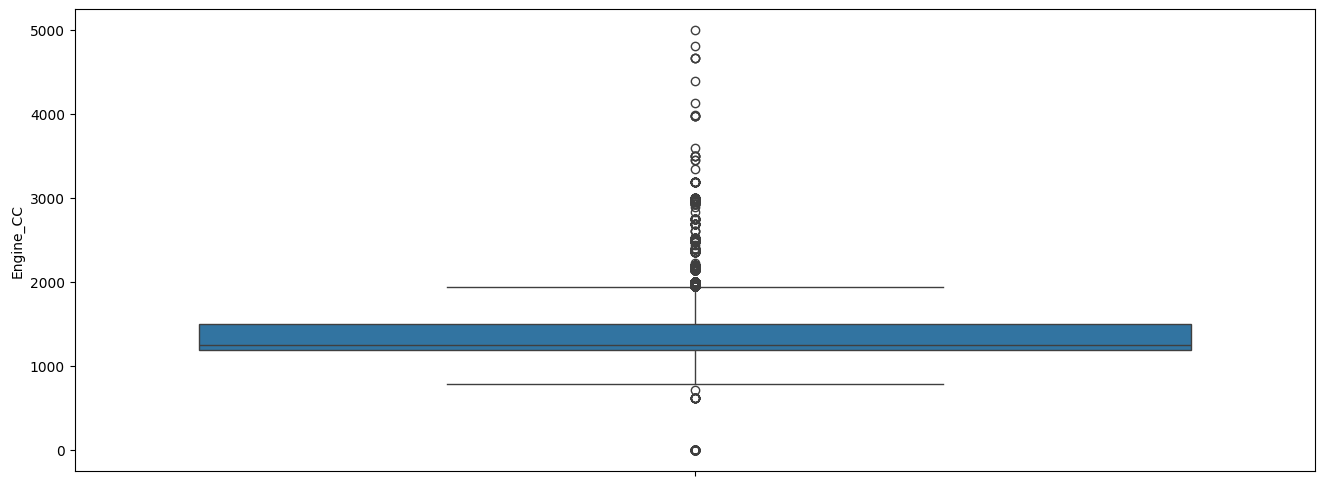

Mileage(kmpl)


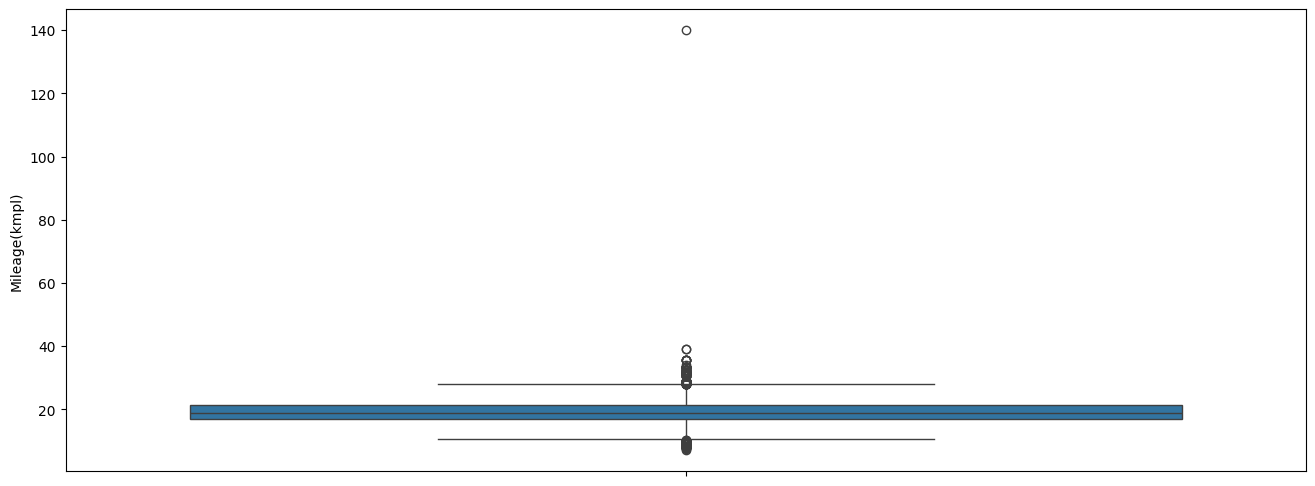

Car_Age


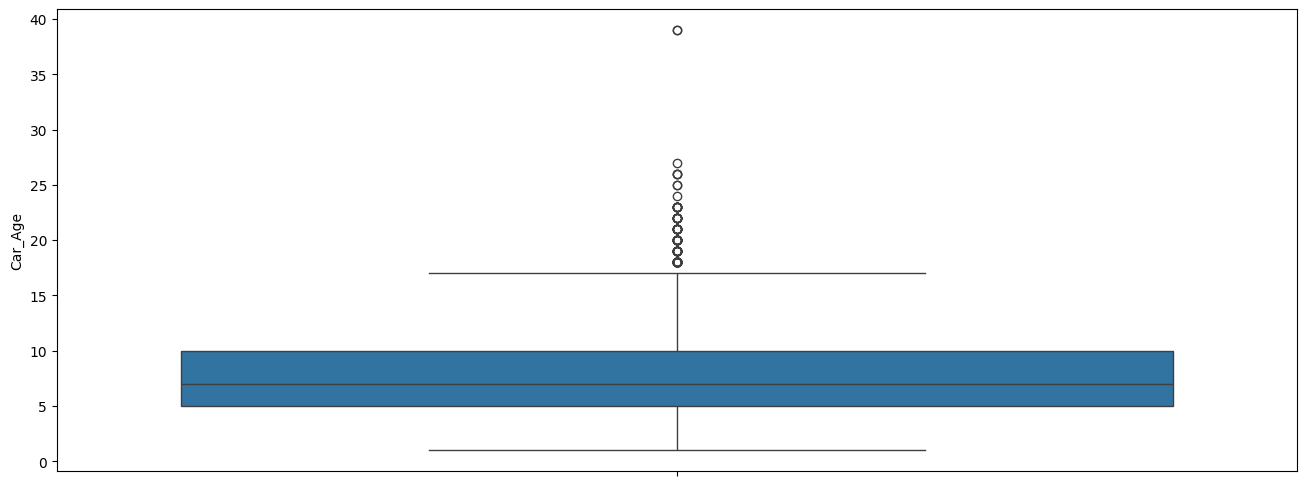

In [85]:
for i in data.columns:
    if data[i].dtype != 'object':
        print(i)
        plt.figure(figsize=(16,6))
        sns.boxplot(data=data[i])
        plt.show()

In [86]:
price = data[(data['Car_Produced_Year']<2009)&(data['Car_Price']>1000000)&(data['Manufactured_By']!= 'BMW')]
data.drop(price.index, inplace = True)

In [87]:
data.to_csv('Car_Dheko.csv', index = False)

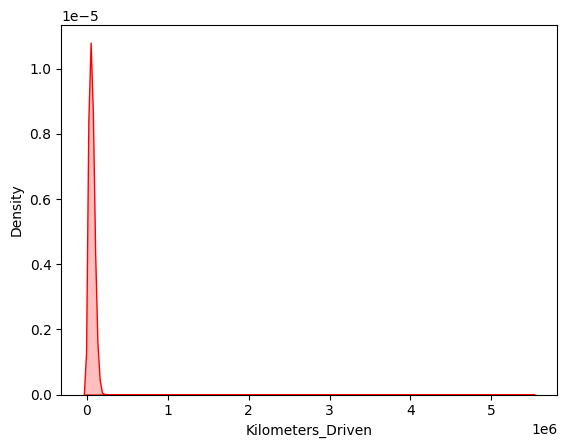

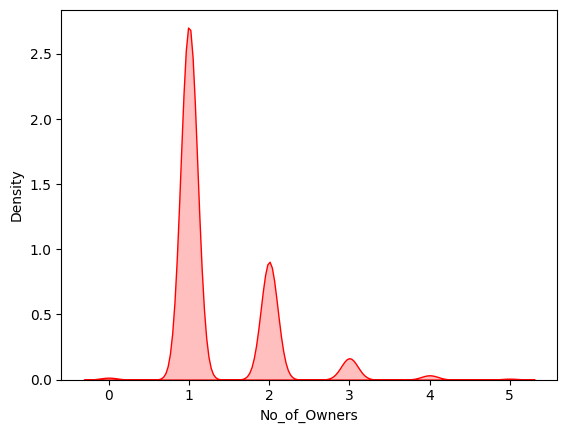

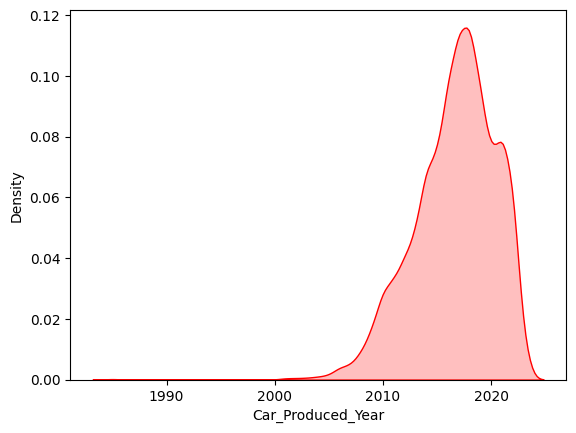

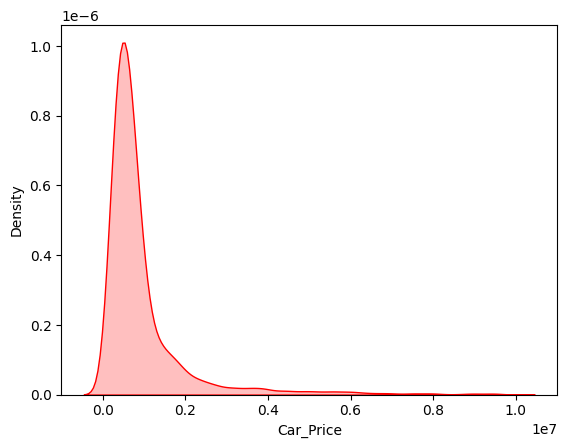

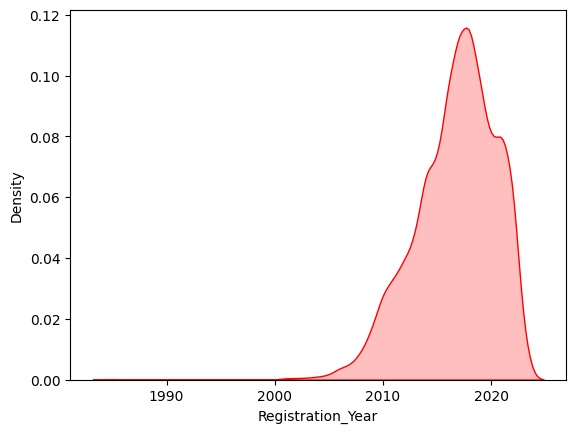

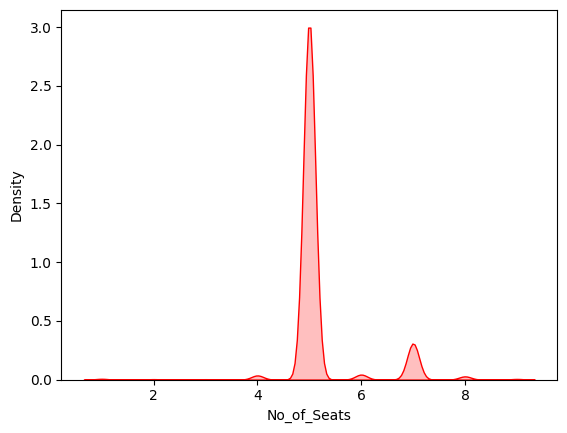

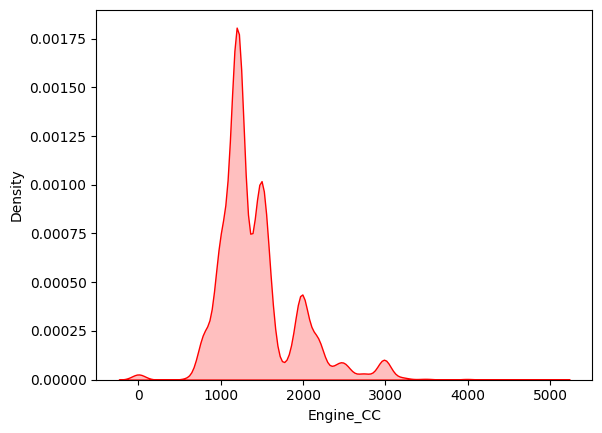

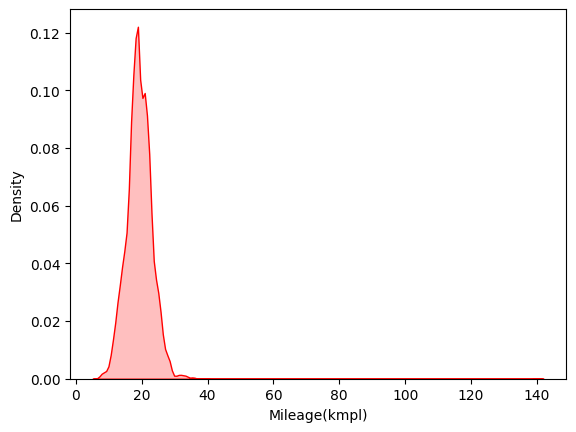

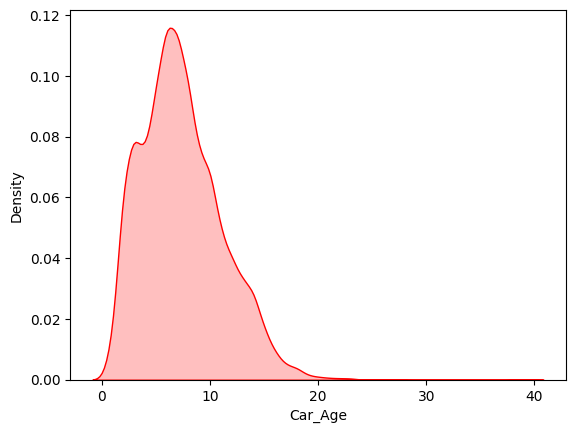

In [88]:
for i in data.columns:
    if data[i].dtype != 'object' :
        sns.kdeplot(data=data[i],fill=True,color="r")
        plt.show()

In [89]:
def inv_trans(x):
    if x!=0:
        return 1/x
    else:
        return 0

# data = data_3.copy()
data['Kilometers_Driven'] = data['Kilometers_Driven'].apply(inv_trans)


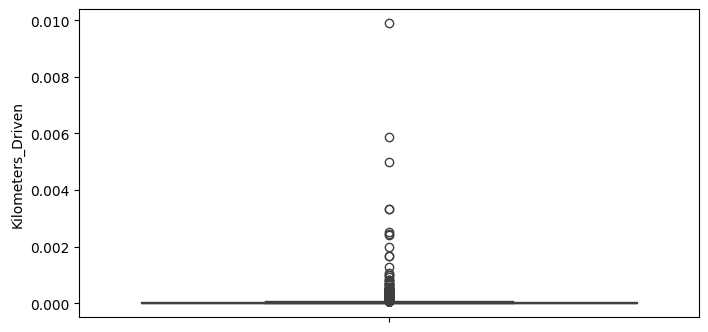

In [90]:
plt.figure(figsize=(8,4))
sns.boxplot(data=data['Kilometers_Driven'])
plt.show()

In [91]:
from sklearn.preprocessing import OrdinalEncoder

enc=OrdinalEncoder()

for i in data.columns:
    if data[i].dtype == 'object':
        col_name = i
        data[i] = enc.fit_transform(data[[i]])
        encode = data[i].sort_values().unique()
        globals()[col_name] = {}
        decoded_data = enc.inverse_transform(data[[i]])
        decoded = sorted(np.unique(decoded_data)) # original value of dataframe - like decoded value
        globals()[i] = dict(zip(decoded, encode))

In [98]:
Location

{'Bangalore': 0.0,
 'Chennai': 1.0,
 'Delhi': 2.0,
 'Hyderabad': 3.0,
 'Jaipur': 4.0,
 'Kolakata': 5.0}

In [99]:
data.to_csv('Preprocessed_Car_Dheko.csv', index = False)

In [100]:
df = pd.read_csv('Preprocessed_Car_Dheko.csv')

In [101]:
continuous = df[['Kilometers_Driven','No_of_Owners','Car_Produced_Year','Car_Price','Registration_Year','No_of_Seats','Engine_CC','Mileage(kmpl)','Car_Age']]
categorical = df[['Fuel_Type','Transmission_Type','Manufactured_By','Car_Model','Location']]

<Axes: >

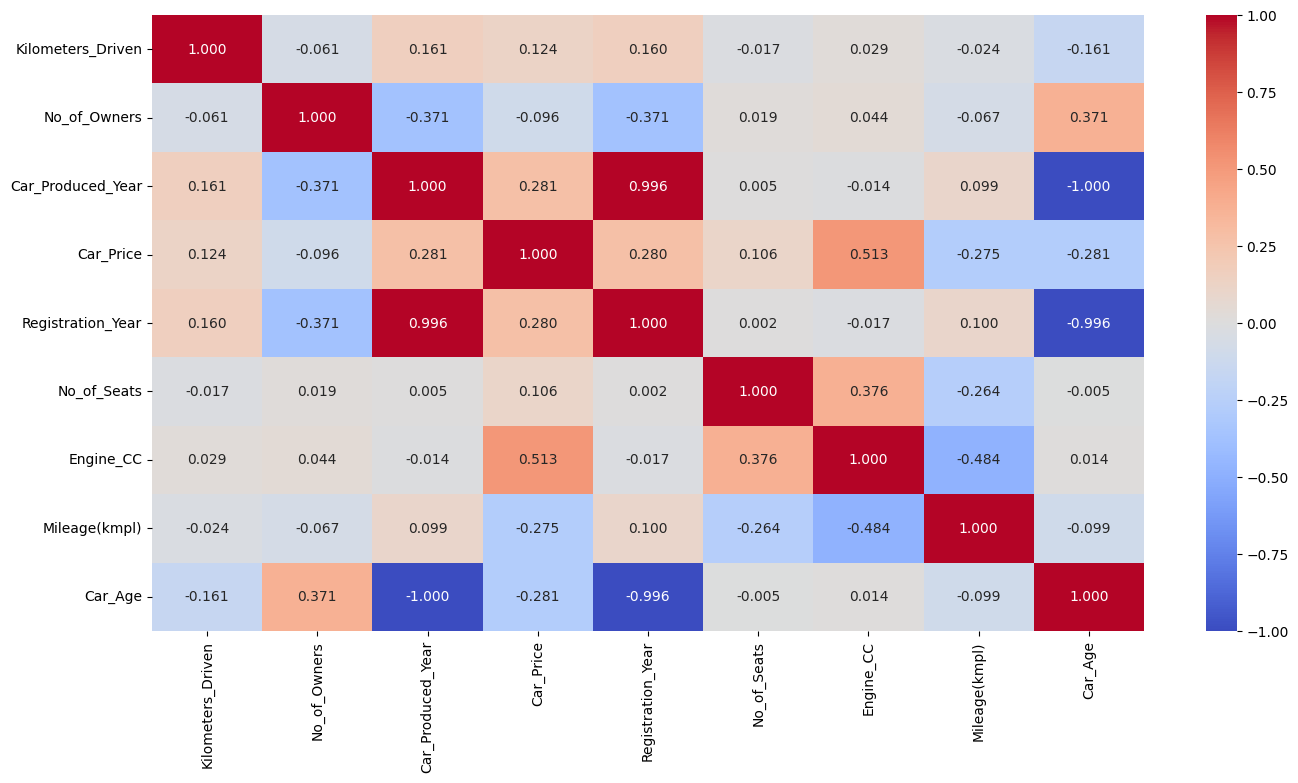

In [102]:
plt.figure(figsize=(16,8))
sns.heatmap(continuous.corr(),annot=True,cmap="coolwarm",fmt=".3f")

In [103]:
df.drop(df[['Registration_Year','Car_Age']], axis = 1, inplace = True)

In [104]:
# checking hypothesis testing categorical column to categorical column
from scipy.stats import chi2_contingency

for i in categorical:
    for j in categorical:
        contingency_table = pd.crosstab(df[i], df[j])
        chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
        print(i,j,p_value)

Fuel_Type Fuel_Type 0.0
Fuel_Type Transmission_Type 9.931466105274275e-24
Fuel_Type Manufactured_By 0.0
Fuel_Type Car_Model 0.0
Fuel_Type Location 4.620896106652552e-36
Transmission_Type Fuel_Type 9.931466105274345e-24
Transmission_Type Transmission_Type 0.0
Transmission_Type Manufactured_By 0.0
Transmission_Type Car_Model 0.0
Transmission_Type Location 7.297526503780326e-33
Manufactured_By Fuel_Type 0.0
Manufactured_By Transmission_Type 0.0
Manufactured_By Manufactured_By 0.0
Manufactured_By Car_Model 0.0
Manufactured_By Location 7.677307698217124e-36
Car_Model Fuel_Type 0.0
Car_Model Transmission_Type 0.0
Car_Model Manufactured_By 0.0
Car_Model Car_Model 0.0
Car_Model Location 3.874836756187625e-49
Location Fuel_Type 4.620896106652552e-36
Location Transmission_Type 7.297526503780431e-33
Location Manufactured_By 7.677307698216902e-36
Location Car_Model 3.874836756187625e-49
Location Location 0.0


In [105]:
from sklearn.ensemble import RandomForestRegressor

In [106]:
features = df.drop('Car_Price',axis = 1)
target = df['Car_Price']

In [107]:
model = RandomForestRegressor(n_estimators=20,random_state=40)
model.fit(features,target)

RandomForestRegressor(n_estimators=20, random_state=40)

In [108]:
model.feature_importances_

array([0.00827431, 0.06838132, 0.08812296, 0.01436933, 0.02286239,
       0.05412224, 0.17954473, 0.02078258, 0.43845531, 0.07410773,
       0.0309771 ])

In [109]:
feature_importance = pd.DataFrame({
    "column": features.columns,
    "Score": model.feature_importances_ *100
}).sort_values('Score',ascending=False)#.head(12).column.values
feature_importance

,column,Score
8,Engine_CC,43.845531
6,Car_Produced_Year,17.954473
2,Transmission_Type,8.812296
9,Mileage(kmpl),7.410773
1,Kilometers_Driven,6.838132
5,Car_Model,5.412224
10,Location,3.097710
4,Manufactured_By,2.286239
7,No_of_Seats,2.078258
3,No_of_Owners,1.436933


In [110]:
x = df.drop(['Car_Price','Manufactured_By','No_of_Seats','Fuel_Type','No_of_Owners'],axis = 1)
y = df['Car_Price']
print(x.shape)
x

(8135, 7)


,Kilometers_Driven,Transmission_Type,Car_Model,Car_Produced_Year,Engine_CC,Mileage(kmpl),Location
0,0.000050,0.0,106.0,2022,998,9.00,1.0
1,0.000048,1.0,158.0,2015,1196,15.37,1.0
2,0.000033,1.0,216.0,2021,999,20.00,1.0
3,0.000017,1.0,87.0,2015,1086,19.81,1.0
4,0.000020,1.0,65.0,2015,1199,18.70,1.0
...,...,...,...,...,...,...,...
8130,0.000100,1.0,154.0,2022,998,25.24,5.0
8131,0.000008,1.0,149.0,2014,796,22.74,5.0
8132,0.000020,0.0,190.0,2011,1796,11.74,5.0
8133,0.000025,1.0,169.0,2012,1197,18.50,5.0


In [111]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2, random_state = 50)

In [112]:
from sklearn.tree import DecisionTreeRegressor
model_DT = DecisionTreeRegressor(criterion = 'squared_error', max_depth = 400, min_samples_split = 10, min_samples_leaf = 7, random_state=50)
model_DT.fit(x_train,y_train)

DecisionTreeRegressor(max_depth=400, min_samples_leaf=7, min_samples_split=10,
                      random_state=50)

In [113]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error,r2_score

y_pred_test = model_DT.predict(x_test)
y_pred_train = model_DT.predict(x_train)

print(mean_absolute_error(y_train, y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

174873.54216499883
253539.7463800967
0.7893820920457689
0.6088234769315297


In [114]:
from sklearn.neighbors import KNeighborsRegressor

In [115]:
model_kn = KNeighborsRegressor(n_neighbors = 4)
model_kn.fit(x_train,y_train)

KNeighborsRegressor(n_neighbors=4)

In [116]:
y_pred_test = model_kn.predict(x_test)
y_pred_train = model_kn.predict(x_train)

print(mean_absolute_error(y_train, y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

147682.00676090966
220412.1081745544
0.8240279743273916
0.6421027998167401


In [117]:
from sklearn.ensemble import AdaBoostRegressor

In [118]:
model_ada = AdaBoostRegressor(n_estimators=1000, learning_rate=0.001)
model_ada.fit(x_train,y_train)

AdaBoostRegressor(learning_rate=0.001, n_estimators=1000)

In [119]:
y_pred_test = model_ada.predict(x_test)
y_pred_train = model_ada.predict(x_train)

print(mean_absolute_error(y_train, y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

382419.41543780285
392580.5835502924
0.5581092128301921
0.5256773702584627


In [120]:
from sklearn.ensemble import RandomForestRegressor
model_RF = RandomForestRegressor(criterion = 'squared_error',n_estimators=700 ,max_depth = 25, min_samples_split = 7, min_samples_leaf = 5, random_state=50)
model_RF.fit(x_train,y_train)

RandomForestRegressor(max_depth=25, min_samples_leaf=5, min_samples_split=7,
                      n_estimators=700, random_state=50)

In [121]:
y_pred_test = model_RF.predict(x_test)
y_pred_train = model_RF.predict(x_train)

print(mean_absolute_error(y_train, y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

154574.77239862864
216011.59087277416
0.8261709993920228
0.7125499584694098


In [122]:
from sklearn.ensemble import GradientBoostingRegressor
model_GB = GradientBoostingRegressor(n_estimators=400, max_depth=10, min_samples_split=7, learning_rate=0.01)
model_GB.fit(x_train,y_train)

GradientBoostingRegressor(learning_rate=0.01, max_depth=10, min_samples_split=7,
                          n_estimators=400)

In [123]:
y_pred_test = model_GB.predict(x_test)
y_pred_train = model_GB.predict(x_train)

print(mean_absolute_error(y_train, y_pred_train))
print(mean_absolute_error(y_test, y_pred_test))
print(r2_score(y_train, y_pred_train))
print(r2_score(y_test, y_pred_test))

73535.18042816629
198720.79096411896
0.9719712389528004
0.6838484749789702


In [124]:
import pickle

with open('GradientBoost_model.pkl', 'wb') as file:
    pickle.dump(model_GB,file)

In [125]:
import pickle

with open('RandomForest_model.pkl', 'wb') as file:
    pickle.dump(model_RF,file)